## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.883655  0.725884  1.181982  1.015916  0.467164  1.857573
1  0.887800  1.354652  1.519685 -1.195479  0.443669  0.634895
2  0.035618  0.216427  1.002031  0.509542 -1.214062  0.581029
3 -1.516431  1.123030 -0.606525  1.118777 -0.311668 -0.521767
4 -0.141922 -1.461151 -1.628650 -0.892247  0.697051 -0.648080


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9906035	total: 56.5ms	remaining: 56.5s
1:	learn: 0.9806321	total: 57.1ms	remaining: 28.5s
2:	learn: 0.9687600	total: 57.6ms	remaining: 19.1s
3:	learn: 0.9582720	total: 58ms	remaining: 14.5s
4:	learn: 0.9465249	total: 58.5ms	remaining: 11.7s
5:	learn: 0.9354561	total: 59ms	remaining: 9.77s
6:	learn: 0.9230395	total: 59.5ms	remaining: 8.44s
7:	learn: 0.9112584	total: 60ms	remaining: 7.43s
8:	learn: 0.9010935	total: 60.5ms	remaining: 6.66s
9:	learn: 0.8913752	total: 61.1ms	remaining: 6.05s
10:	learn: 0.8809961	total: 61.6ms	remaining: 5.54s
11:	learn: 0.8707427	total: 62.1ms	remaining: 5.11s
12:	learn: 0.8619380	total: 62.6ms	remaining: 4.75s
13:	learn: 0.8524472	total: 63ms	remaining: 4.44s
14:	learn: 0.8440078	total: 63.6ms	remaining: 4.17s
15:	learn: 0.8353831	total: 64.1ms	remaining: 3.94s
16:	learn: 0.8267227	total: 64.7ms	remaining: 3.74s
17:	learn: 0.8192886	total: 65.1ms	remaining: 3.55s
18:	learn: 0.8113837	total: 65.6ms	remaining: 3.39s


105:	learn: 0.3673350	total: 109ms	remaining: 916ms
106:	learn: 0.3641057	total: 109ms	remaining: 911ms
107:	learn: 0.3614370	total: 110ms	remaining: 907ms
108:	learn: 0.3585589	total: 111ms	remaining: 904ms
109:	learn: 0.3556680	total: 111ms	remaining: 901ms
110:	learn: 0.3527829	total: 112ms	remaining: 896ms
111:	learn: 0.3504286	total: 112ms	remaining: 890ms
112:	learn: 0.3476634	total: 113ms	remaining: 886ms
113:	learn: 0.3446706	total: 113ms	remaining: 880ms
114:	learn: 0.3419813	total: 114ms	remaining: 874ms
115:	learn: 0.3393701	total: 114ms	remaining: 871ms
116:	learn: 0.3366267	total: 115ms	remaining: 867ms
117:	learn: 0.3338047	total: 115ms	remaining: 863ms
118:	learn: 0.3313193	total: 116ms	remaining: 858ms
119:	learn: 0.3291279	total: 116ms	remaining: 853ms
120:	learn: 0.3264109	total: 117ms	remaining: 849ms
121:	learn: 0.3236415	total: 117ms	remaining: 845ms
122:	learn: 0.3214642	total: 118ms	remaining: 840ms
123:	learn: 0.3189995	total: 118ms	remaining: 837ms
124:	learn: 

255:	learn: 0.1405956	total: 187ms	remaining: 544ms
256:	learn: 0.1396602	total: 188ms	remaining: 543ms
257:	learn: 0.1389100	total: 188ms	remaining: 542ms
258:	learn: 0.1382258	total: 189ms	remaining: 540ms
259:	learn: 0.1375819	total: 189ms	remaining: 539ms
260:	learn: 0.1369001	total: 190ms	remaining: 538ms
261:	learn: 0.1360865	total: 190ms	remaining: 536ms
262:	learn: 0.1351964	total: 191ms	remaining: 535ms
263:	learn: 0.1346378	total: 191ms	remaining: 534ms
264:	learn: 0.1340693	total: 192ms	remaining: 532ms
265:	learn: 0.1334743	total: 192ms	remaining: 531ms
266:	learn: 0.1329939	total: 193ms	remaining: 530ms
267:	learn: 0.1323809	total: 194ms	remaining: 529ms
268:	learn: 0.1315425	total: 194ms	remaining: 527ms
269:	learn: 0.1310626	total: 195ms	remaining: 526ms
270:	learn: 0.1303584	total: 195ms	remaining: 525ms
271:	learn: 0.1296285	total: 196ms	remaining: 524ms
272:	learn: 0.1290524	total: 197ms	remaining: 523ms
273:	learn: 0.1283775	total: 197ms	remaining: 522ms
274:	learn: 

469:	learn: 0.0614188	total: 292ms	remaining: 329ms
470:	learn: 0.0611705	total: 292ms	remaining: 328ms
471:	learn: 0.0610881	total: 293ms	remaining: 327ms
472:	learn: 0.0610155	total: 293ms	remaining: 327ms
473:	learn: 0.0609043	total: 294ms	remaining: 326ms
474:	learn: 0.0606803	total: 294ms	remaining: 325ms
475:	learn: 0.0606102	total: 295ms	remaining: 324ms
476:	learn: 0.0605107	total: 295ms	remaining: 324ms
477:	learn: 0.0602748	total: 296ms	remaining: 323ms
478:	learn: 0.0601676	total: 296ms	remaining: 322ms
479:	learn: 0.0600960	total: 297ms	remaining: 321ms
480:	learn: 0.0600064	total: 297ms	remaining: 321ms
481:	learn: 0.0596399	total: 298ms	remaining: 320ms
482:	learn: 0.0592808	total: 298ms	remaining: 319ms
483:	learn: 0.0589599	total: 299ms	remaining: 319ms
484:	learn: 0.0586583	total: 299ms	remaining: 318ms
485:	learn: 0.0584475	total: 300ms	remaining: 317ms
486:	learn: 0.0581412	total: 301ms	remaining: 317ms
487:	learn: 0.0578210	total: 301ms	remaining: 316ms
488:	learn: 

623:	learn: 0.0323031	total: 370ms	remaining: 223ms
624:	learn: 0.0322054	total: 371ms	remaining: 223ms
625:	learn: 0.0320294	total: 371ms	remaining: 222ms
626:	learn: 0.0319092	total: 372ms	remaining: 221ms
627:	learn: 0.0317330	total: 372ms	remaining: 220ms
628:	learn: 0.0315620	total: 373ms	remaining: 220ms
629:	learn: 0.0314686	total: 373ms	remaining: 219ms
630:	learn: 0.0312975	total: 374ms	remaining: 218ms
631:	learn: 0.0311799	total: 374ms	remaining: 218ms
632:	learn: 0.0310530	total: 375ms	remaining: 217ms
633:	learn: 0.0308858	total: 375ms	remaining: 217ms
634:	learn: 0.0307825	total: 376ms	remaining: 216ms
635:	learn: 0.0306673	total: 376ms	remaining: 215ms
636:	learn: 0.0305452	total: 377ms	remaining: 215ms
637:	learn: 0.0303968	total: 377ms	remaining: 214ms
638:	learn: 0.0302292	total: 378ms	remaining: 213ms
639:	learn: 0.0300662	total: 378ms	remaining: 213ms
640:	learn: 0.0299076	total: 379ms	remaining: 212ms
641:	learn: 0.0297464	total: 379ms	remaining: 211ms
642:	learn: 

841:	learn: 0.0139578	total: 474ms	remaining: 89ms
842:	learn: 0.0139070	total: 475ms	remaining: 88.5ms
843:	learn: 0.0138302	total: 475ms	remaining: 87.9ms
844:	learn: 0.0137727	total: 476ms	remaining: 87.3ms
845:	learn: 0.0136944	total: 477ms	remaining: 86.8ms
846:	learn: 0.0136579	total: 477ms	remaining: 86.2ms
847:	learn: 0.0136175	total: 478ms	remaining: 85.6ms
848:	learn: 0.0135697	total: 478ms	remaining: 85ms
849:	learn: 0.0134957	total: 479ms	remaining: 84.5ms
850:	learn: 0.0134480	total: 479ms	remaining: 83.9ms
851:	learn: 0.0133928	total: 480ms	remaining: 83.3ms
852:	learn: 0.0133389	total: 480ms	remaining: 82.7ms
853:	learn: 0.0132856	total: 481ms	remaining: 82.2ms
854:	learn: 0.0132505	total: 481ms	remaining: 81.6ms
855:	learn: 0.0132160	total: 482ms	remaining: 81.1ms
856:	learn: 0.0131415	total: 483ms	remaining: 80.5ms
857:	learn: 0.0130953	total: 483ms	remaining: 80ms
858:	learn: 0.0130433	total: 484ms	remaining: 79.4ms
859:	learn: 0.0129970	total: 484ms	remaining: 78.9ms

995:	learn: 0.0082258	total: 553ms	remaining: 2.22ms
996:	learn: 0.0082093	total: 553ms	remaining: 1.66ms
997:	learn: 0.0081950	total: 553ms	remaining: 1.11ms
998:	learn: 0.0081809	total: 555ms	remaining: 555us
999:	learn: 0.0081687	total: 555ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

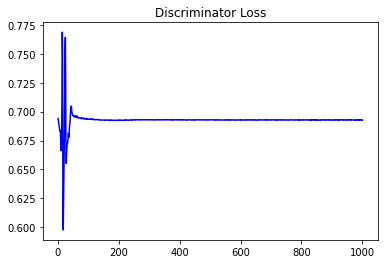

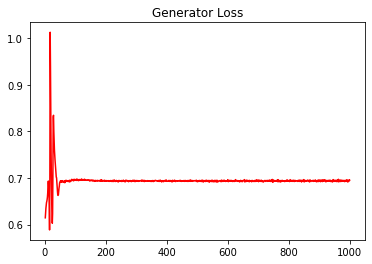

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.18068470668327716


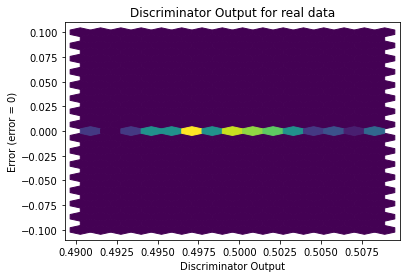

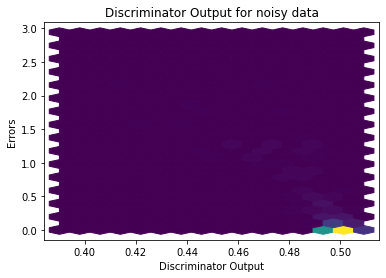

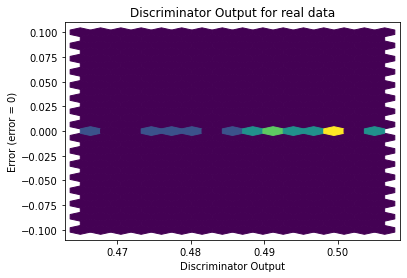

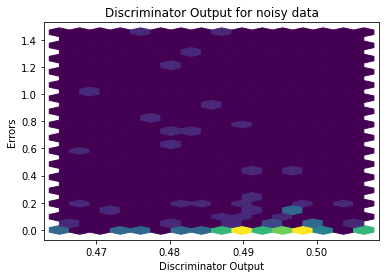

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


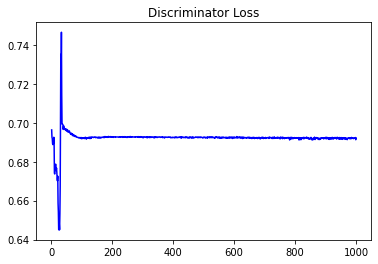

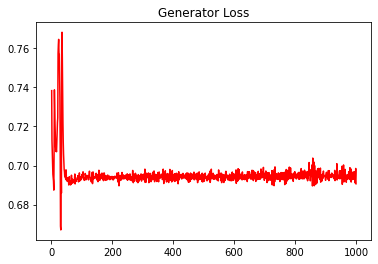

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.16974998630566998


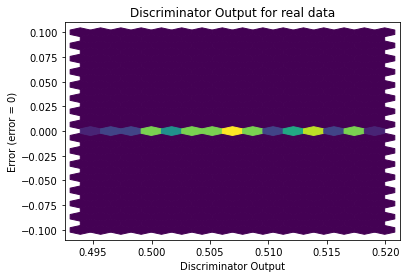

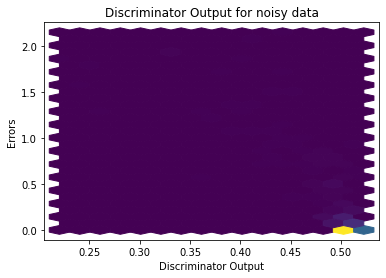

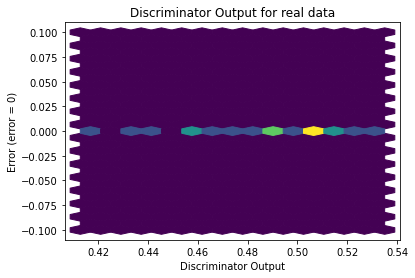

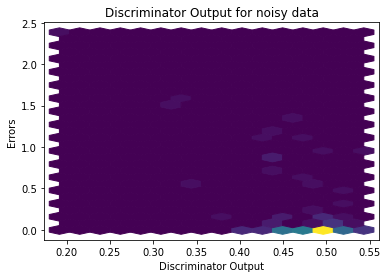

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7990]], requires_grad=True)
